In [ ]:
!pip install telepot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for telepot: filename=telepot-12.7-py3-none-any.whl size=57939 sha256=e0ad715d9cb90b8e412710f7b9f691d996925f3c4041e8d66954bfce632f9536
  Stored in directory: /root/.cache/pip/wheels/9f/9a/92/2e34a093e40a09338847e54dc9fcaab4ce01a59ba17c784c6c
Successfully built telepot


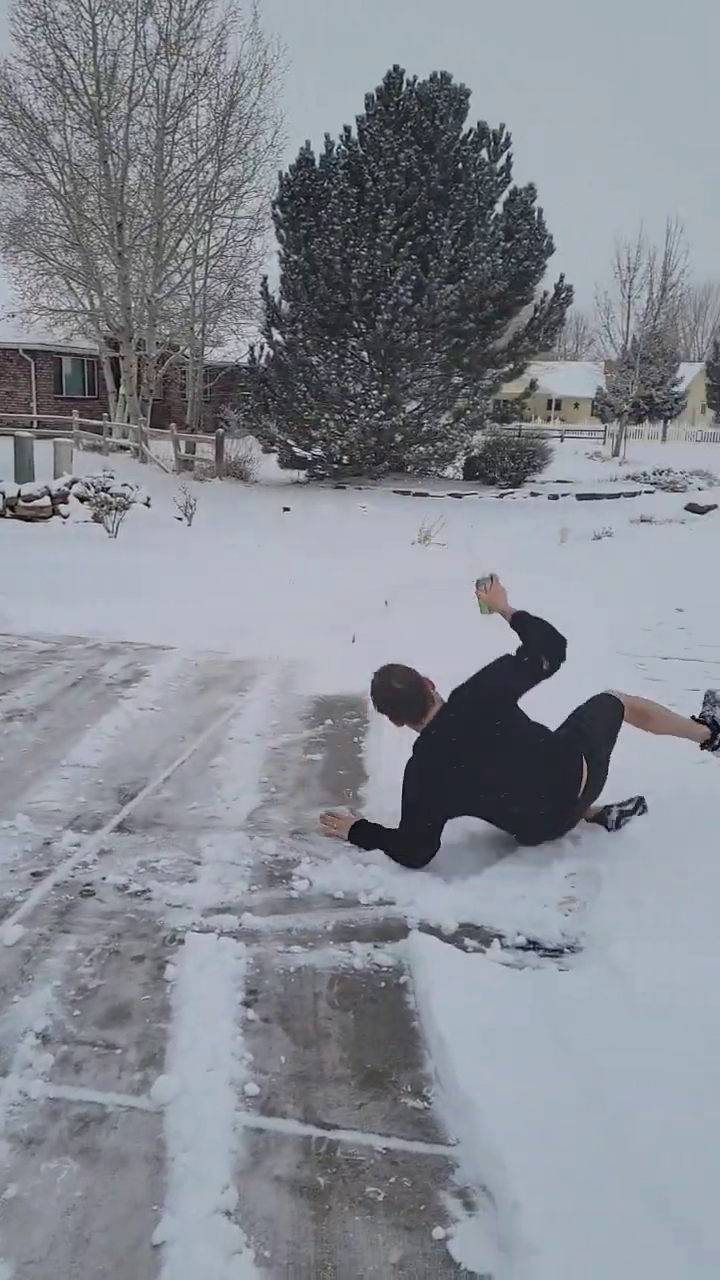

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import telepot
# Import the telepot library
# Initialize your Telegram bot with the API token
bot = telepot.Bot('your Telegram bot API token')
# Create a VideoCapture object to capture video from a webcam (in Google Colab, you can use a sample video)
cap = cv2.VideoCapture('/content/fall6.mp4')  #video source

# Initialize variables for fall detection
frame_count = 0
prev_frame = None
motion_threshold = 45000

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_count += 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    if prev_frame is None:
        prev_frame = gray
        continue

    frame_diff = cv2.absdiff(prev_frame, gray)
    _, thresh = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)
    thresh = cv2.dilate(thresh, None, iterations=2)

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    motion_detected = False

    for contour in contours:
        if cv2.contourArea(contour) > motion_threshold:
            motion_detected = True
            break

    if motion_detected:
        #print(f"Fall detected in frame {frame_count}")
        filename = f'fall_detected_{frame_count}.jpg'
        cv2.imwrite(filename, frame)
        cv2_imshow(frame)

        # Send the frame to Telegram when a fall is detected
        with open(filename, 'rb') as photo:
            bot.sendPhoto('1154792534', photo, caption=f'Fall detected at frame {frame_count}')

    prev_frame = gray

cap.release()
cv2.destroyAllWindows()